## Bibliotheken laden

In [1]:
from arcgis.learn import YOLOv3
from arcgis.learn import prepare_data

## Transformationen definieren & Trainingsdaten laden

In [2]:
from fastai.vision.transform import rotate, brightness, contrast, flip_lr 
# Data Augmentation um die Menge an Trainingsdaten zu erhöhen und Varianz in die Daten zu bringen

# Transformationen für das Training --> siehe fastai vision transfroms
train_tfms = [
brightness(change=(0.4, 0.6)),
contrast(scale=(0.75, 1.5)),
rotate(degrees=10, p=0.3),
flip_lr()
]
# Transformationen für das Validationsdataset
val_tfms = []

# Transformationen werden an die Funktion als Tuple übergeben
trfrms = (train_tfms, val_tfms)

In [3]:
data = prepare_data(r"D:\ArcGIS\Pro Projekte\Goertzwerk_FMV\GeoAI\training_data\export_256", 
                    val_split_pct=0.1, 
                    batch_size=4, 
                    resize_to=256,
                    transforms=trfrms)

## Modell initialisieren & trainieren

In [4]:
model = YOLOv3(data)

In [5]:
import torch
torch.cuda.empty_cache()

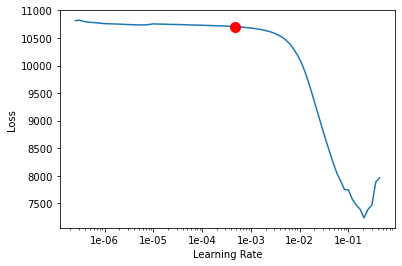

In [6]:
lr = model.lr_find()

In [7]:
lr

0.0004786300923226385

In [8]:
model.fit(epochs=100,lr=lr,early_stopping=True)

epoch     train_loss  valid_loss  average_precision  time    
0         10692.65429710071.5117190.044368           00:16     
1         10650.48632810020.5839840.059972           00:15     
2         10602.4316419959.874023 0.067247           00:15     
3         10543.2138679884.492188 0.070250           00:15     
4         10465.6601569785.855469 0.058594           00:15     
5         10360.2275399645.422852 0.090666           00:15     
6         10212.0712899444.358398 0.079727           00:15     
7         10000.0224619154.447266 0.138243           00:15     
8         9692.992188 8737.745117 0.120435           00:15     
9         9258.093750 8157.944336 0.105492           00:16     
10        8661.922852 7388.226562 0.126004           00:16     
11        7866.458008 6410.517090 0.094073           00:16     
12        6906.510254 5348.341797 0.083912           00:17     
13        5845.415527 4272.821289 0.036104           00:16     
14        4758.807129 3263.052002 0.050191

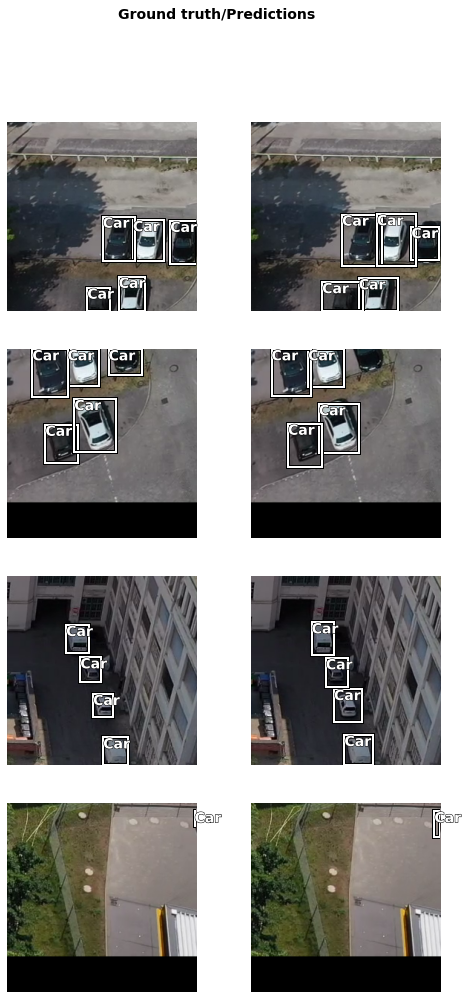

In [10]:
model.show_results(rows=5, thresh=0.1, nms_overlap=0.1)

## Modell speichern

In [11]:
model.save(r"D:\ArcGIS\Pro Projekte\Goertzwerk_FMV\GeoAI\models\YoloCar41e")

Computing model metrics...


WindowsPath('D:/ArcGIS/Pro Projekte/Goertzwerk_FMV/GeoAI/models/YoloCar41e')

## Modell auf Video anwenden

In [16]:
model.predict_video(r"D:\ArcGIS\Pro Projekte\Goertzwerk_FMV\FMV_Data\Video\goertzwerk_1min.ts",
                    r"D:\ArcGIS\Pro Projekte\Goertzwerk_FMV\FMV_Data\Metadata\goertzwerk_1min_20210704142851237_20210704142850937.csv",
                    threshold=0.3,
                    visualize=True)

D:\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\Lib\site-packages\arcgis\learn\_video_utils.py:225: UserWarning:

Field 'vmtilocaldataset' already exists in the file, appending column at the end.

D:\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\Lib\site-packages\arcgis\learn\_video_utils.py:229: UserWarning:

Writing 698 rows only!

